In [3]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

# Cargar el archivo CSV que contiene datos de distritos con geometrías GeoJSON
df_distritos = pd.read_csv('poblacion.csv', sep=';')

# Supongamos que tienes las coordenadas del epicentro del sismo y su profundidad
epicentro_lon = -76.9899
epicentro_lat = -12.0464
magnitud_momento = 6.0
profundidad = 10  # en kilómetros

# Calcular el radio de impacto
R = 10 ** (0.5 * magnitud_momento - 1.2) * profundidad

# Crear el punto del epicentro del sismo como un objeto Point
epicentro = Point(epicentro_lon, epicentro_lat)

# Crear un buffer circular alrededor del epicentro del sismo
area_de_efecto = epicentro.buffer(R)


In [4]:
# Convertir la columna Geo Shape a objetos Shapely y crear un GeoDataFrame
geometrias = df_distritos['Geo Shape'].apply(lambda geom: shape(eval(geom)))
gdf_distritos = gpd.GeoDataFrame(df_distritos, geometry=geometrias)


In [5]:
# Filtrar los distritos que intersectan con el área de efecto
distritos_en_area_efecto = gdf_distritos[gdf_distritos['geometry'].intersects(area_de_efecto)]


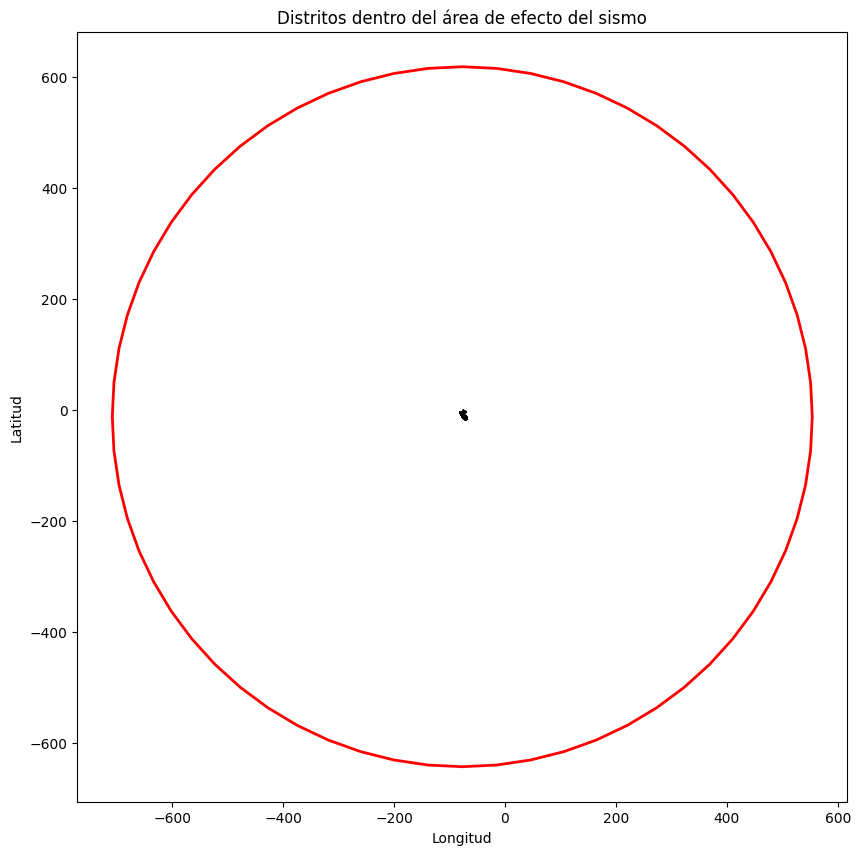

In [6]:
# Plotear los distritos y el área de efecto
ax = distritos_en_area_efecto.plot(edgecolor='black', figsize=(10, 10))
gpd.GeoSeries([area_de_efecto]).plot(ax=ax, facecolor='none', edgecolor='red', linewidth=2)

# Configurar etiquetas y título
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')
ax.set_title('Distritos dentro del área de efecto del sismo')

# Mostrar el gráfico
plt.show()
